# Creativity Study Analysis | Elizabeth Levitis

In [1]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import savemat,loadmat
import math
from copy import deepcopy
from scikits.bootstrap import bootstrap

In [2]:
## Credit: https://zhiyzuo.github.io/Pearson-Correlation-CI-in-Python/

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    x = np.array(x)
    y = np.array(y)
    bad = ~np.logical_or(pd.isnull(x), pd.isnull(y))
    x = np.compress(bad, x)
    y = np.compress(bad, y) 
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r,p,lo, hi

In [3]:
def plot_correlation(x, y, x_label, y_label): 
    [r, p, lo, hi] = pearsonr_ci(x, y, alpha = 0.05)
    sns.regplot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print('Without bootstrap:')
    print('r: ' + str(r))
    print('lo: ' + str(lo))
    print('hi: ' + str(hi))
    print('p: ' + str(p))
    bad = ~np.logical_or(np.isnan(x), np.isnan(y))
    x = np.compress(bad, x)
    y = np.compress(bad, y) 
    x = bootstrap.ci((x, y), stats.pearsonr, output='lowhigh')
    print('With BCa 95% CIs:')
    print(x[:,0])

In [57]:
creativity_data = pd.read_excel('creativity_study_no_formatting.xlsx')
creativity_data.replace('.', 'NaN')
creativity_data = creativity_data.drop(['Subject ID', 'First Name', 'Last Name'], axis=1)
creativity_data.head()

,Sex,Age,Date of Birth,Language,Education,Height (inch),Weight (lb),BMI,Family History (AD/PD or >90),Reason for exclusion,...,Alcohol - Number of Uses in Past 30 Days,Cannabis Age of First Use,Cannabis Number of Lifetime Uses,Cannabis Number of Uses in Past 30 Days,Nicotine - Age of First Use,Nicotine - Number of Lifetime Uses,Nicotine - Number of Uses in Past 30 Days,Guilford Alternative Uses Total,Cognitive Failures,CAARS
0,1.0,19.0,NaN,English,14.0,NaN,NaN,NaN,NaN,NaN,...,5.0,14.0,350.0,10.0,14.0,1600.0,3.0,22.0,66.0,74.0
1,2.0,25.0,NaN,English,19.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,7.0,47.0,91.0
2,2.0,20.0,NaN,English,15.0,NaN,NaN,NaN,NaN,NaN,...,6.0,15.0,100.0,4.0,12.0,40.0,3.0,27.0,44.0,79.0
3,2.0,18.0,NaN,English,12.0,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,0.0,0.0,NaN,0.0,0.0,15.0,49.0,86.0
4,2.0,18.0,NaN,English,13.0,NaN,NaN,NaN,NaN,NaN,...,7.0,15.0,100.0,4.0,NaN,0.0,0.0,13.0,47.0,96.0


In [15]:
creativity_data['Subject ID']
liza_participants = list(range(0,30))
valerie_participants = list(range(30,47))

Liza's participants
Without bootstrap:
r: -0.3597195428443643
lo: -0.6460893078752854
hi: 0.015427850546954395
p: 0.06008538450282493
With BCa 95% CIs:
[-0.64374731 -0.02787203]
Valerie's participants
Without bootstrap:
r: 0.16714745564936237
lo: -0.34088338741112223
hi: 0.5996196487724851
p: 0.5213871063642521
With BCa 95% CIs:
[-0.29108592  0.61533074]


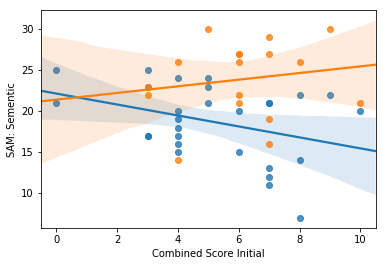

In [32]:
# Combined initial score vs SAM (Semantic)
#sns.regplot(creativity_data['VM_CombinedScore_Initial'], creativity_data['SAM - Sementic'])
#plt.xlabel('Combined Initial Score')
#plt.ylabel('SAM - Semantic')

print("Liza's participants")
plot_correlation(x=creativity_data.loc[liza_participants,'VM_CombinedScore_Initial'],y=creativity_data.loc[liza_participants,'SAM - Sementic'], x_label='Combined Score Initial',y_label='SAM: Sementic')
print("Valerie's participants")
plot_correlation(x=creativity_data.loc[valerie_participants,'VM_CombinedScore_Initial'],y=creativity_data.loc[valerie_participants,'SAM - Sementic'], x_label='Combined Score Initial',y_label='SAM: Sementic')

Liza's participants
Without bootstrap:
r: 0.36947059781847247
lo: 0.010614222552525927
hi: 0.6440156193666572
p: 0.04449250704232779


/anaconda3/envs/jpserver/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/anaconda3/envs/jpserver/lib/python3.6/site-packages/scikits/bootstrap/bootstrap.py:231: RuntimeWarning: invalid value encountered in less
  z0 = nppf( ( 1.0*np.sum(stat < ostat, axis=0)  ) / n_samples )


With BCa 95% CIs:
[0.06719149 0.64913131]
Valerie's participants
Without bootstrap:
r: -0.06487942558460202
lo: -0.5290270356949651
hi: 0.4291478689115724
p: 0.8046072813357521
With BCa 95% CIs:
[-0.65528965  0.44056528]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


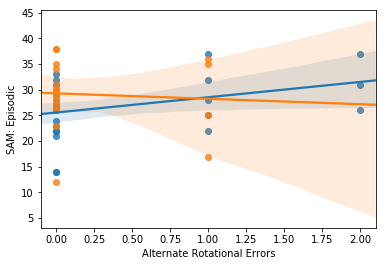

In [30]:
print("Liza's participants")
plot_correlation(x=creativity_data.loc[liza_participants,'VM_Probe9.2AltRotErrors'],y=creativity_data.loc[liza_participants,'SAM - Episodic '], x_label='Alternate Rotational Errors',y_label='SAM: Episodic')
print("Valerie's participants")
plot_correlation(x=creativity_data.loc[valerie_participants,'VM_Probe9.2AltRotErrors'],y=creativity_data.loc[valerie_participants,'SAM - Episodic '], x_label='Alternate Rotational Errors',y_label='SAM: Episodic')

Liza's participants
Without bootstrap:
r: -0.3620931115528188
lo: -0.6432355289670352
hi: 0.005087758561269434
p: 0.05357781033154676
With BCa 95% CIs:
[-0.63020951 -0.0939331 ]
Valerie's participants
Without bootstrap:
r: 0.17239161883859727
lo: -0.3361022903946261
hi: 0.6030667953496072
p: 0.5082085508296459
With BCa 95% CIs:
[-0.30880953  0.5979805 ]


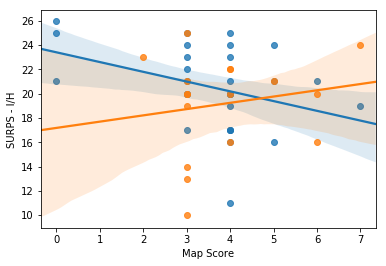

In [48]:
print("Liza's participants")
plot_correlation(x=creativity_data.loc[liza_participants,'VM_MapScore'],y=creativity_data.loc[liza_participants,'SURPS - I/H'], x_label='Map Score',y_label='SURPS - I/H')
print("Valerie's participants")
plot_correlation(x=creativity_data.loc[valerie_participants,'VM_MapScore'],y=creativity_data.loc[valerie_participants, 'SURPS - I/H'], x_label='Map Score',y_label='SURPS - I/H')

Liza's participants
Without bootstrap:
r: -0.38184532202141547
lo: -0.656477914507041
hi: -0.017835727044857176
p: 0.0409498060164039
With BCa 95% CIs:
[-0.62971687 -0.07011175]
Valerie's participants
Without bootstrap:
r: 0.20323127149645845
lo: -0.30744538957380657
hi: 0.6230183316628555
p: 0.4340174111120503
With BCa 95% CIs:
[-0.30655377  0.68434091]


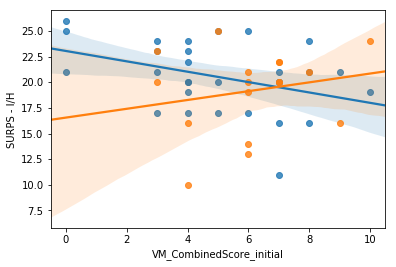

In [46]:
print("Liza's participants")
plot_correlation(x=creativity_data.loc[liza_participants,'VM_CombinedScore_Initial'],y=creativity_data.loc[liza_participants,'SURPS - I/H'], x_label='VM_CombinedScore_initial',y_label='SURPS - I/H')
print("Valerie's participants")
plot_correlation(x=creativity_data.loc[valerie_participants,'VM_CombinedScore_Initial'],y=creativity_data.loc[valerie_participants,'SURPS - I/H'], x_label='VM_CombinedScore_initial',y_label='SURPS - I/H')

Liza's participants
Without bootstrap:
r: 0.40474921252498036
lo: 0.029231327487385
hi: 0.6801491909344259
p: 0.036243116705699054
With BCa 95% CIs:
[-0.01489554  0.67339319]
Valerie's participants
Without bootstrap:
r: -0.3087182474231004
lo: -0.6873686364817603
hi: 0.2018826328698776
p: 0.22795247925791967


/anaconda3/envs/jpserver/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/anaconda3/envs/jpserver/lib/python3.6/site-packages/scikits/bootstrap/bootstrap.py:231: RuntimeWarning: invalid value encountered in less
  z0 = nppf( ( 1.0*np.sum(stat < ostat, axis=0)  ) / n_samples )


With BCa 95% CIs:
[-0.71389426         nan]


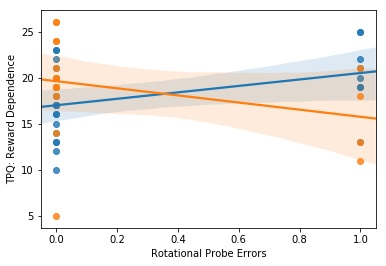

In [49]:
print("Liza's participants")
plot_correlation(x=creativity_data.loc[liza_participants,'VM_Probe9.2RotErrors'],y=creativity_data.loc[liza_participants,'TPQ - Reward Dependence '], x_label='Rotational Probe Errors',y_label='TPQ: Reward Dependence')
print("Valerie's participants")
plot_correlation(x=creativity_data.loc[valerie_participants,'VM_Probe9.2RotErrors'],y=creativity_data.loc[valerie_participants,'TPQ - Reward Dependence '], x_label='Rotational Probe Errors',y_label='TPQ: Reward Dependence')

Liza's participants
Without bootstrap:
r: -0.3943651781147374
lo: -0.6607557812462176
hi: -0.03974247199442835
p: 0.03104405175686253
With BCa 95% CIs:
[-0.68324339 -0.08001085]
Valerie's participants
Without bootstrap:
r: -0.05746190248967362
lo: -0.5236442619797367
hi: 0.4352026215235705
p: 0.8266069683394953
With BCa 95% CIs:
[-0.4780603  0.4515538]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


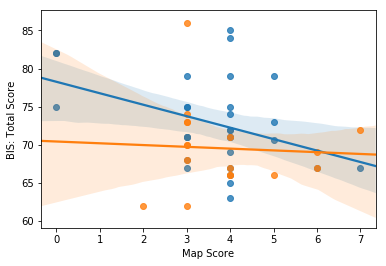

In [34]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'BIS - Total Score'], 'Map Score', 'BIS: Total Score')
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'BIS - Total Score'], 'Map Score', 'BIS: Total Score')

Liza's participants
Without bootstrap:
r: -0.4910763796470246
lo: -0.730346974148898
hi: -0.14446717664254524
p: 0.007964342320054805
With BCa 95% CIs:
[-0.74591194 -0.18881274]
Valerie's participants
Without bootstrap:
r: 0.3685415349928516
lo: -0.13623568853392962
hi: 0.7213993759314294
p: 0.14549913811398046
With BCa 95% CIs:
[-0.13169179  0.66637857]


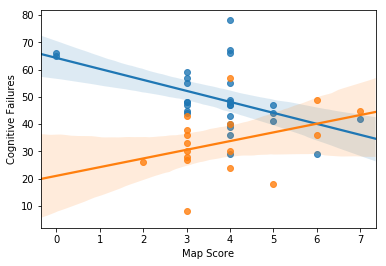

In [35]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'Cognitive Failures'], 'Map Score', 'Cognitive Failures')
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'Cognitive Failures'], 'Map Score', 'Cognitive Failures')

Liza's participants
Without bootstrap:
r: -0.3782575005064787
lo: -0.658418913930797
hi: -0.006031770158493739
p: 0.047173652640023225
With BCa 95% CIs:
[-0.67225769  0.04544503]
Valerie's participants
Without bootstrap:
r: 0.21716751769635867
lo: -0.29418433611732636
hi: 0.631858609914207
p: 0.40244493397354997
With BCa 95% CIs:
[-0.44767252  0.64149062]


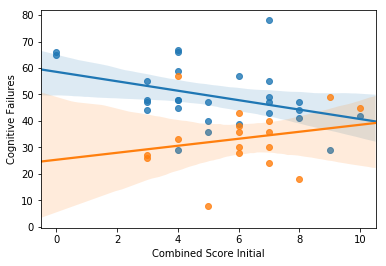

In [36]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_CombinedScore_Initial'], creativity_data.loc[liza_participants,'Cognitive Failures'], 'Combined Score Initial', 'Cognitive Failures')
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_CombinedScore_Initial'], creativity_data.loc[valerie_participants,'Cognitive Failures'], 'Combined Score Initial', 'Cognitive Failures')

Liza's participants
Without bootstrap:
r: -0.5228795103338356
lo: -0.7431551095374044
hi: -0.20035209304944057
p: 0.0030309689438915723
With BCa 95% CIs:
[-0.67515227 -0.32371214]
Valerie's participants
Without bootstrap:
r: -0.3332081451348236
lo: -0.7015037524432611
hi: 0.1755521283569419
p: 0.19123462083325898
With BCa 95% CIs:
[-0.69631062  0.32214516]


([<matplotlib.axis.XTick at 0x1a12cb0470>,
 <a list of 3 Text xticklabel objects>)

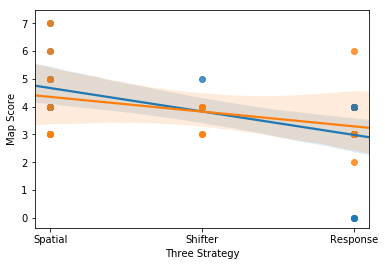

In [37]:
three_strategies = ['Spatial', 'Shifter', 'Response']
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_ThreeStrategy'], creativity_data.loc[liza_participants,'VM_MapScore'], x_label="Three Strategy", y_label="Map Score")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_ThreeStrategy'], creativity_data.loc[valerie_participants,'VM_MapScore'], x_label="Three Strategy", y_label="Map Score")
plt.xticks([1,2,3], ["Spatial", "Shifter", "Response"])

Without bootstrap:
r: 0.04993963389090489
lo: -0.24721824429998962
hi: 0.33851131645388893
p: 0.7445896680402255
With BCa 95% CIs:
[-0.25856535  0.34711306]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  


([<matplotlib.axis.XTick at 0x11160a390>,
 <a list of 3 Text xticklabel objects>)

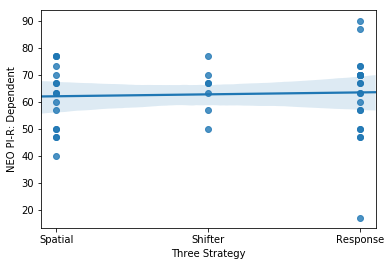

In [185]:
three_strategies = ['Spatial', 'Shifter', 'Response']
plot_correlation(creativity_data['VM_ThreeStrategy'], creativity_data['NEO PI-R : Dependent'], x_label="Three Strategy", y_label = "NEO PI-R: Dependent")
plt.xticks([1,2,3], ["Spatial", "Shifter", "Response"])

Without bootstrap:
r: 0.13978078957098597
lo: -0.15688327826836113
hi: 0.41330760071253697
p: 0.3541817683999329
With BCa 95% CIs:
[-0.18268591  0.42276595]


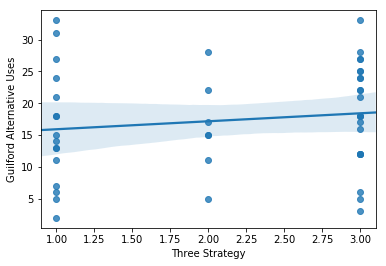

In [218]:
plot_correlation(creativity_data['VM_ThreeStrategy'], creativity_data['Guilford Alternative Uses Total '], x_label="Three Strategy", y_label = "Guilford Alternative Uses")

Liza's participants
Without bootstrap:
r: -0.3018987901090384
lo: -0.597212309927018
hi: 0.06549386207418234
p: 0.1049332492499118
With BCa 95% CIs:
[-0.58247438 -0.00606761]
Valerie's participants
Without bootstrap:
r: -0.22948547338911685
lo: -0.639583540681823
hi: 0.28229692328847367
p: 0.37560068781350875
With BCa 95% CIs:
[-0.72373188  0.37547389]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/anaconda3/envs/jpserver/lib/python3.6/site-packages/scikits/bootstrap/bootstrap.py:231: RuntimeWarning: invalid value encountered in less
  z0 = nppf( ( 1.0*np.sum(stat < ostat, axis=0)  ) / n_samples )


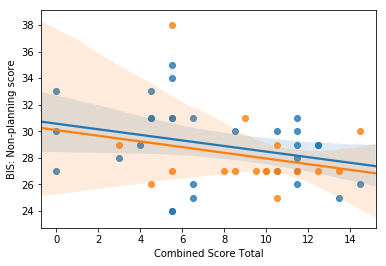

In [38]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_CombinedScore_Total'], creativity_data.loc[liza_participants,'BIS - Non_Planning Score'], x_label="Combined Score Total", y_label = "BIS: Non-planning score")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_CombinedScore_Total'], creativity_data.loc[valerie_participants,'BIS - Non_Planning Score'], x_label="Combined Score Total", y_label = "BIS: Non-planning score")

Without bootstrap:
r: 0.8733675708642561
lo: 0.782437887753371
hi: 0.9278320748025947
p: 1.1753652466985204e-15
With BCa 95% CIs:
[0.77761865 0.93456258]


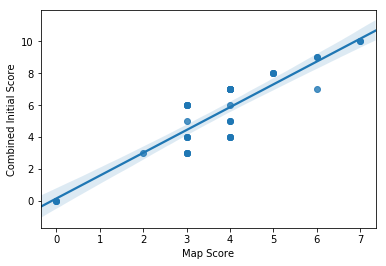

In [243]:
plot_correlation(creativity_data['VM_MapScore'], creativity_data['VM_CombinedScore_Initial'], x_label="Map Score", y_label = "Combined Initial Score")

Liza's participants
Without bootstrap:
r: 0.060664219288793474
lo: -0.3268855203652182
hi: 0.43074804258563026
p: 0.7637335758147756


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


With BCa 95% CIs:
[-0.37163668  0.45319078]
Valerie's participants
Without bootstrap:
r: -0.13481070035156514
lo: -0.5780031416215606
hi: 0.36979534627362143
p: 0.6059480764619536
With BCa 95% CIs:
[-0.52146909  0.34129356]


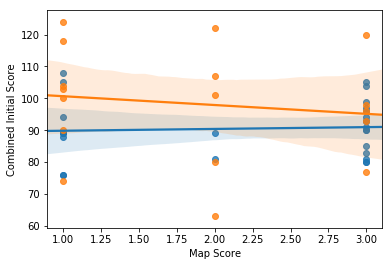

In [44]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_ThreeStrategy'], creativity_data.loc[liza_participants,'SAM - Total '], x_label="Map Score", y_label = "Combined Initial Score")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_ThreeStrategy'], creativity_data.loc[valerie_participants,'SAM - Total '], x_label="Map Score", y_label = "Combined Initial Score")

Without bootstrap:
r: 0.01730937381745939
lo: -0.27763517130870274
hi: 0.3092719096763877
p: 0.9101449697581158
With BCa 95% CIs:
[-0.30462968  0.40911664]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


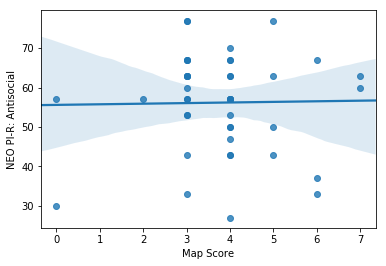

In [263]:
plot_correlation(creativity_data['VM_MapScore'], creativity_data['NEO PI-R : Antisocial'], x_label="Map Score", y_label = "NEO PI-R: Antisocial")

Liza's participants
Without bootstrap:
r: -0.21956714307366754
lo: -0.5477730073061877
hi: 0.16720658580214684
p: 0.26159180204119364
With BCa 95% CIs:
[-0.52150509  0.08336709]
Valerie's participants
Without bootstrap:
r: -0.012356112246224833
lo: -0.49009028083503037
hi: 0.47108638912175455
p: 0.9624602843207151
With BCa 95% CIs:
[-0.385947    0.29810035]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


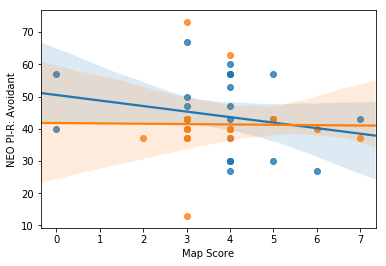

In [45]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'NEO PI-R : Avoidant'], x_label="Map Score", y_label = "NEO PI-R: Avoidant")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'NEO PI-R : Avoidant'], x_label="Map Score", y_label = "NEO PI-R: Avoidant")

Without bootstrap:
r: -0.01881325351770872
lo: -0.3106317549686805
hi: 0.2762461803291526
p: 0.9023743394799512
With BCa 95% CIs:
[-0.2869548   0.31005822]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


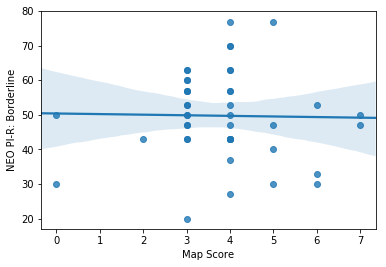

In [265]:
plot_correlation(creativity_data['VM_MapScore'], creativity_data['NEO PI-R : Borderline'], x_label="Map Score", y_label = "NEO PI-R: Borderline")

Without bootstrap:
r: 0.214446532647436
lo: -0.0844001428199952
hi: 0.4778980391160899
p: 0.1571893536728908
With BCa 95% CIs:
[-0.13233711  0.63841454]


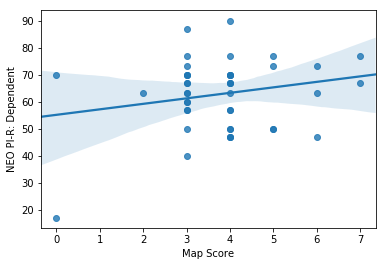

In [266]:
plot_correlation(creativity_data['VM_MapScore'], creativity_data['NEO PI-R : Dependent'], x_label="Map Score", y_label = "NEO PI-R: Dependent")

Liza's participants
Without bootstrap:
r: 0.29340137497332375
lo: -0.08946893850214135
hi: 0.6007224526855011
p: 0.12968993122747152
With BCa 95% CIs:
[-0.18160374  0.74843291]
Valerie's participants
Without bootstrap:
r: 0.06473026756370744
lo: -0.42927006216270697
hi: 0.5289191609204821
p: 0.8050483631210497
With BCa 95% CIs:
[-0.42503965  0.50976947]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used top 10 low/high samples; results may be unstable.
  


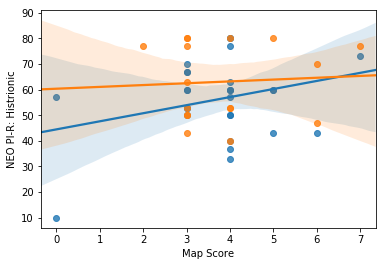

In [43]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'NEO PI-R : Histrionic'], x_label="Map Score", y_label = "NEO PI-R: Histrionic")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'NEO PI-R : Histrionic'], x_label="Map Score", y_label = "NEO PI-R: Histrionic")

Liza's participants
Without bootstrap:
r: 0.3524612334117464
lo: -0.02373699501818131
hi: 0.641220741588183
p: 0.06583326039287093
With BCa 95% CIs:
[-0.13349097  0.78517765]
Valerie's participants
Without bootstrap:
r: 0.02640891539206594
lo: -0.4600757332060876
hi: 0.5006981659675654
p: 0.9198603677287739
With BCa 95% CIs:
[-0.56349349  0.45584817]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/ipykernel_launcher.py:14: InstabilityWarning: Some values used extremal samples; results are probably unstable.
  


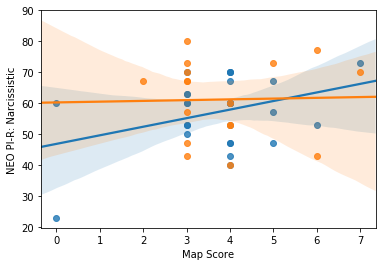

In [41]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'NEO PI-R : Narcissistic'], x_label="Map Score", y_label = "NEO PI-R: Narcissistic")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'NEO PI-R : Narcissistic'], x_label="Map Score", y_label = "NEO PI-R: Narcissistic")

Liza's participants
Without bootstrap:
r: 0.34487299509675184
lo: -0.032368613961462595
hi: 0.6361058945296444
p: 0.0722889747365517
With BCa 95% CIs:
[-0.23414486  0.79194417]
Valerie's participants
Without bootstrap:
r: 0.2641390835557033
lo: -0.24798973178460704
hi: 0.6608804104205879
p: 0.30561760990599834
With BCa 95% CIs:
[-0.1588034   0.60463216]


/anaconda3/envs/jpserver/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/anaconda3/envs/jpserver/lib/python3.6/site-packages/scikits/bootstrap/bootstrap.py:231: RuntimeWarning: invalid value encountered in less
  z0 = nppf( ( 1.0*np.sum(stat < ostat, axis=0)  ) / n_samples )


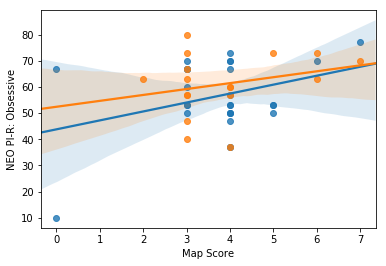

In [40]:
print("Liza's participants")
plot_correlation(creativity_data.loc[liza_participants,'VM_MapScore'], creativity_data.loc[liza_participants,'NEO PI-R : Obsessive'], x_label="Map Score", y_label = "NEO PI-R: Obsessive")
print("Valerie's participants")
plot_correlation(creativity_data.loc[valerie_participants,'VM_MapScore'], creativity_data.loc[valerie_participants,'NEO PI-R : Obsessive'], x_label="Map Score", y_label = "NEO PI-R: Obsessive")